<a href="https://colab.research.google.com/github/mehadisaki/TSF_GRIP_intern_task_Mehadi/blob/main/Task_1%3A%20Prediction_Supervise_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The Sparks Foundation GRIP-Data Science and Business Analytics Intern 

# Task-1: Prediction using Supervise Machine Learning

> **Mehadi Hassan Saki**


> Batch October22








# Library import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load Data set and Explore


Predict the percentage of student score based on the study hours

In [ ]:
data_url = "http://bit.ly/w-data"
data = pd.read_csv(data_url)
#data = pd.DataFrame(data)

In [ ]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Check Data quality

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

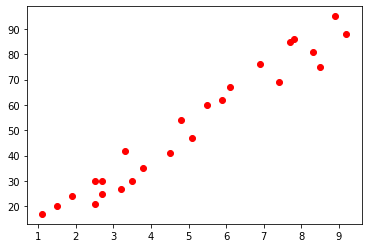

In [ ]:
plt.scatter(data.Hours,data.Scores,  color="Red")

Checking correlation score


In [ ]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Have highly corelation score


# Linear Regression model creation

Difine indipendent variable (x) and target variable (y)

In [ ]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

## split the data set

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
print(x)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [ ]:
print(y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state= 28)

## Ordinary least squares Linear Regression model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lrfit = lr.fit(x_train,y_train) 

In [ ]:
pred_lr = lr.predict(x_test)

In [ ]:
print(pred_lr)

[77.60629708 74.69272571 21.2772506  60.12486886 36.8162979 ]


In [ ]:
print(y_test)

[85 69 24 62 30]


In [ ]:
print(x_test)

[[7.7]
 [7.4]
 [1.9]
 [5.9]
 [3.5]]


Draw plot for predicted values with test values

Text(0, 0.5, 'score')

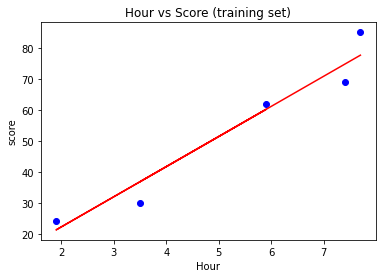

In [ ]:
plt.scatter(x_test,y_test, color= 'Blue')
plt.plot(x_test,pred_lr, color= "red")
plt.title("Hour vs Score (training set)")
plt.xlabel("Hour")
plt.ylabel("score")

### Score of the student who's study time 9.25hr/day by Ordinary least squares Linear Regression

In [ ]:
print("Score of the Student who's study time is 9.25hr/day : ", lr.predict([[9.25]])[0])

Score of the Student who's study time is 9.25hr/day :  92.65974915422066


##Support vector regression

In [ ]:
#Reshape Y value to 2d array
ry_t = y_train.reshape(len(y_train),1)
ry_ts = y_test.reshape(len(y_test),1)

In [ ]:
print(ry_t)

[[17]
 [25]
 [88]
 [86]
 [60]
 [95]
 [27]
 [42]
 [81]
 [76]
 [30]
 [67]
 [54]
 [41]
 [75]
 [21]
 [30]
 [35]
 [20]
 [47]]


In [ ]:
# Feature scaling need for SV regression
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x_sc_t = sc_x.fit_transform(x_train)  # x train
x_sc_ts = sc_x.transform(x_test)      # x test
y_sc_t = sc_y.fit_transform(ry_t)     # y train
y_sc_ts = sc_y.transform(ry_ts)       # y test

In [ ]:
# creating regressor
from sklearn.svm import SVR
svr = SVR(kernel="rbf")

In [ ]:
# Fit the SVR model
svr.fit(x_sc_t,y_sc_t)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [ ]:
#predice the test values
pred_svr = svr.predict(x_sc_ts)

In [ ]:
pred_svr 

array([ 1.17283851,  1.08289441, -1.10284464,  0.45986054, -0.65316873])

In [ ]:
#reshape for inversing the scale to original scale
pred_svr_r= pred_svr.reshape(len(pred_svr),1)

In [ ]:
#Inverse the scale 
pred_svr_i = sc_y.inverse_transform(pred_svr_r)

In [ ]:
print(pred_svr_i)

[[80.2652832 ]
 [78.00944731]
 [23.1901925 ]
 [62.38349569]
 [34.46825341]]


In [ ]:
# change to othe original shape
pred_svr_o= pred_svr_i.reshape(len(pred_svr_i))

In [ ]:
print(pred_svr_o)

[80.2652832  78.00944731 23.1901925  62.38349569 34.46825341]


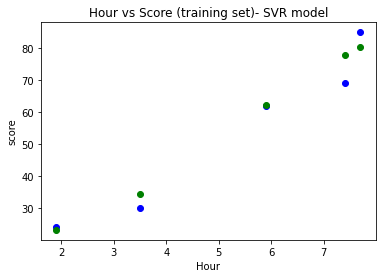

In [ ]:
# plot the original value and predicted value
plt.scatter(x_test,y_test, color= 'Blue')
plt.scatter(x_test, pred_svr_o, color= "green")
#plt.plot(x_test, pred_svr_o, color= "red")
plt.title("Hour vs Score (training set)- SVR model")
plt.xlabel("Hour")
plt.ylabel("score")
plt.show()

### Score of the student who's study time 9.25hr/day By SVR model

In [ ]:
pred_svr_p = svr.predict(sc_x.transform([[9.25]]))
pred_svr_p = sc_y.inverse_transform(pred_svr_p.reshape(-1,1))
pred_svr_p = pred_svr_p.reshape(len(pred_svr_p))
print("Score of the Student who's study time is 9.25hr/day : ", pred_svr_p[0])

Score of the Student who's study time is 9.25hr/day :  84.16277702195742


##Stochastic Gradient Descent 

In [ ]:
from sklearn.linear_model import SGDRegressor
SGD = SGDRegressor()

In [ ]:
SGD.fit(x_sc_t,y_sc_t)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor()

In [ ]:
pred_SGD = SGD.predict(x_sc_ts)

In [ ]:
#Inverse transform
pred_SGD_i = sc_y.inverse_transform(pred_SGD.reshape(len(pred_SGD),1)) 

In [ ]:
#Original Shape
pred_SGD_o = pred_SGD_i.reshape(len(pred_SGD_i))
print(pred_SGD_o)

[73.97913117 71.45912217 25.2589572  58.85907718 38.69900519]


Text(0, 0.5, 'score')

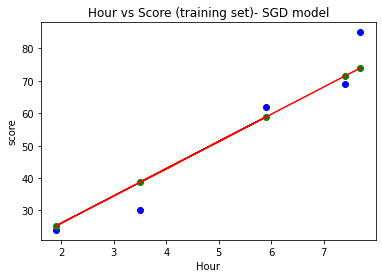

In [ ]:
# plot the original value and predicted value
plt.scatter(x_test,y_test, color= 'Blue')
plt.scatter(x_test,pred_SGD_o, color= "green")
plt.plot(x_test, pred_SGD_o, color= "red")
plt.title("Hour vs Score (training set)- SGD model")
plt.xlabel("Hour")
plt.ylabel("score")

### Score of the student who's study time 9.25hr/day By SGD model

In [ ]:
pred_SGD_p = SGD.predict(sc_x.transform([[9.25]]))
pred_SGD_p = sc_y.inverse_transform(pred_SGD_p.reshape(-1,1))
pred_SGD_p = pred_SGD_p.reshape(len(pred_SGD_p))
print("Score of the Student who's study time is 9.25hr/day : ", pred_SGD_p[0])

Score of the Student who's study time is 9.25hr/day :  86.99917766198095


# Model Evaluation

In [ ]:
from sklearn import metrics

In [ ]:
print("R-squre value of Linear model= ", metrics.r2_score(y_test,pred_lr))
print("R-squre value of SVR model= ",metrics.r2_score(y_test,pred_svr_o))
print("R-squre value of SGD model= ",metrics.r2_score(y_test,pred_SGD_o))
print ("Model with larger  R2 value is the better model")

R-squre value of Linear model=  0.9470046342300579
R-squre value of SVR model=  0.9543815738599556
R-squre value of SGD model=  0.9212656301089248
Model with larger  R2 value is the better model


Model with larger R2 value is the better model

In [ ]:
# Error metrics of Linear regression model
print('RMSE of LR: ',np.sqrt(metrics.mean_squared_error(y_test, pred_lr)))
# Error metrics of SVR model
print('RMSE of SVR: ',np.sqrt(metrics.mean_squared_error(y_test, pred_svr_o)))
print('RMSE of SGD: ',np.sqrt(metrics.mean_squared_error(y_test, pred_SGD_o)))
print ("Model with minimum RMSE value is the better model")

RMSE of LR:  5.375227754967453
RMSE of SVR:  4.987099952031463
RMSE of SGD:  6.551792004071418
Model with minimum RMSE value is the better model


In [ ]:
##adjust r2 calculation
n=len(x) # data size
k=1 # number of feature
r2_lr = metrics.r2_score(y_test,pred_lr)
r2_svr = metrics.r2_score(y_test,pred_svr_o)
r2_SGD = metrics.r2_score(y_test,pred_SGD_o)
adj_r2_score_lr = 1 - ((1-r2_lr )*(n-1)/(n-k-1))   #adjust r2 calculation
adj_r2_score_svr = 1 - ((1-r2_svr )*(n-1)/(n-k-1))
adj_r2_score_SGD = 1 - ((1-r2_SGD )*(n-1)/(n-k-1))
print("Adjust R2 for LR : ", adj_r2_score_lr)
print("Adjust R2 for SVR : ", adj_r2_score_svr)
print("Adjust R2 for SGD : ", adj_r2_score_SGD)
print ("Model with larger Adjust R2 value is the better model")

Adjust R2 for LR :  0.9447004878922343
Adjust R2 for SVR :  0.9523981640277798
Adjust R2 for SGD :  0.9178423966353998
Model with larger Adjust R2 value is the better model


## Conclusion


Best Model
*   Model with minimum RMSE value : SVR
*   Model with larger R2 value : SVR
*   Model with larger Adjust R2 value : SVR

So best model is Support vector Regression.




In [ ]:
print("By SVR modle.")
print("Score of the Student who's study time is 9.25hr/day : ", pred_svr_p[0])

By SVR modle.
Score of the Student who's study time is 9.25hr/day :  84.16277702195742
